In [611]:
%matplotlib inline
from modelclass import *
import itertools as it

# Sample model

In [945]:
Nd = 2

n_dq = 1

n_fermion = np.array([
    [0,1,0,0,0],
    [6,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

n_multiplet = np.array([
    [0,1,0,0,0],
    [6,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

In [946]:
MC.UV.coeffs, SMC.UV.coeffs

([-0.7957747154594768,
  0.15198177546350644,
  0.15198177546350666,
  0.2122065907891939,
  1.1504176059390434,
  0.4052847345693511],
 [0.15915494309189548,
  0.7514654453473385,
  0.7599088773175333,
  3.978873577297384,
  7.003826819276599,
  2.0264236728467555])

In [880]:
for Nd in range(2,5):
    Af, As, Ag = [coeffs[0] for coeffs in pc_Nd[Nd]]
    Df, Ds, Dg = [coeffs[3] for coeffs in pc_Nd[Nd]]
    
    print(f'Nd = {Nd}')
    
    for vis_idx in range(1,4):
        for dark_idx in range(1,4):
            nv, nd = np.ceil((-1*Ag - 6*Af[1,0])/Af[vis_idx, dark_idx]), np.ceil((-1*Dg - Df[0,1])/Df[vis_idx,dark_idx])
            print(f'({cn.SUN_irreps[3][vis_idx][0]}, {cn.SUN_irreps[Nd][dark_idx][0]}): {int(max(nv, nd))}')

Nd = 2
(3, 2): 6
(3, 3): 4
(3, 4): 3
(6, 2): 2
(6, 3): 1
(6, 4): 1
(8, 2): 2
(8, 3): 1
(8, 4): 1
Nd = 3
(3, 3): 6
(3, 6): 2
(3, 8): 2
(6, 3): 3
(6, 6): 1
(6, 8): 1
(8, 3): 2
(8, 6): 1
(8, 8): 1
Nd = 4
(3, 4): 7
(3, 6): 4
(3, 10): 2
(6, 4): 4
(6, 6): 2
(6, 10): 1
(8, 4): 3
(8, 6): 2
(8, 10): 1


In [915]:
for Nd in range(2,5):
    Am, Ag = [coeffs[0] for coeffs in pc_SUSY_Nd[Nd]]
    Dm, Dg = [coeffs[3] for coeffs in pc_SUSY_Nd[Nd]]
    
    print(f'Nd = {Nd}')
    
    for vis_idx in range(1,4):
        for dark_idx in range(1,4):
            nv, nd = np.ceil((-1/2*Ag - 6*Am[1,0])/Am[vis_idx, dark_idx]), np.ceil((-1/2*Dg - Dm[0,1])/Dm[vis_idx,dark_idx])
            print(f'({cn.SUN_irreps[3][vis_idx][0]}, {cn.SUN_irreps[Nd][dark_idx][0]}): {int(max(nv, nd))}')

Nd = 2
(3, 2): 2
(3, 3): 1
(3, 4): 1
(6, 2): 1
(6, 3): 1
(6, 4): 1
(8, 2): 1
(8, 3): 1
(8, 4): 1
Nd = 3
(3, 3): 3
(3, 6): 1
(3, 8): 1
(6, 3): 2
(6, 6): 1
(6, 8): 1
(8, 3): 1
(8, 6): 1
(8, 8): 1
Nd = 4
(3, 4): 4
(3, 6): 2
(3, 10): 1
(6, 4): 2
(6, 6): 1
(6, 10): 1
(8, 4): 2
(8, 6): 1
(8, 10): 1


In [951]:
for Nd in range(2,5):
    Af, As, Ag = [coeffs[0] for coeffs in pc_Nd[Nd]]
    Df, Ds, Dg = [coeffs[3] for coeffs in pc_Nd[Nd]]
    
    print(f'Nd = {Nd}')
    
    for vis_idx in range(1,4):
        for dark_idx in range(1,4):
            nv, nd = np.ceil((-1*Ag - 6*Af[1,0])/Af[vis_idx, dark_idx]), np.ceil((-1*Dg - Df[0,1])/Df[vis_idx,dark_idx])
            n = int(max(nv, nd))
            if n == 1:
                A = Af[vis_idx, dark_idx] + 6*Af[1,0] + Ag
                M = 1e19*np.exp(-56/(A+1.1))
                print(f'({cn.SUN_irreps[3][vis_idx][0]}, {cn.SUN_irreps[Nd][dark_idx][0]}): {A:.2f}, {M:.1e}')
            

Nd = 2
(6, 3): 0.48, 3.8e+03
(6, 4): 1.01, 2.9e+07
(8, 3): 0.80, 1.5e+06
(8, 4): 1.43, 2.5e+09
Nd = 3
(6, 6): 2.07, 2.1e+11
(6, 8): 3.13, 1.8e+13
(8, 6): 2.71, 4.1e+12
(8, 8): 3.98, 1.6e+14
Nd = 4
(6, 10): 4.19, 2.5e+14
(8, 10): 5.25, 1.5e+15


In [956]:
for Nd in range(2,5):
    Am, Ag = [coeffs[0] for coeffs in pc_SUSY_Nd[Nd]]
    Dm, Dg = [coeffs[3] for coeffs in pc_SUSY_Nd[Nd]]
    
    print(f'Nd = {Nd}')
    
    for vis_idx in range(1,4):
        for dark_idx in range(1,4):
            nv, nd = np.ceil((-1/2*Ag - 6*Am[1,0])/Am[vis_idx, dark_idx]), np.ceil((-1/2*Dg - Dm[0,1])/Dm[vis_idx,dark_idx])
            n = int(max(nv, nd))
            if n == 1 and not ((Nd == 2) and (vis_idx == 1) and (dark_idx == 2)):
                A = 2*Am[vis_idx, dark_idx] + 12*Am[1,0] + Ag
                M = 1e19*np.exp(-40/(A+0.5))
                print(f'({cn.SUN_irreps[3][vis_idx][0]}, {cn.SUN_irreps[Nd][dark_idx][0]}): {A:.2f}, {M:.1e}')

Nd = 2
(3, 4): 0.16, 4.4e-08
(6, 2): 1.11, 1.7e+08
(6, 3): 1.91, 6.2e+11
(6, 4): 2.71, 3.8e+13
(8, 2): 1.43, 1.0e+10
(8, 3): 2.39, 9.6e+12
(8, 4): 3.34, 3.0e+14
Nd = 3
(3, 6): 0.48, 1.7e+01
(3, 8): 0.80, 3.9e+05
(6, 6): 4.30, 2.4e+15
(6, 8): 5.89, 1.9e+16
(8, 3): 2.39, 9.6e+12
(8, 6): 5.25, 9.5e+15
(8, 8): 7.16, 5.4e+16
Nd = 4
(3, 10): 1.11, 1.7e+08
(6, 6): 4.30, 2.4e+15
(6, 10): 7.48, 6.7e+16
(8, 6): 5.25, 9.5e+15
(8, 10): 9.07, 1.5e+17


In [901]:
Am[1,0]

0.07957747154594767

In [899]:
Am[2,2] + 6*Am[1,0] + Ag

1.4323944878270585

In [849]:
b = 3
np.log10(1e19*np.exp(-56/(b+1.1)))

13.068172930101925

# Finding a model with a low value of $M$

In [602]:
Nd = 3

n_dq = 5

n_fermion = np.array([
    [0,7,0,0,0],
    [7,3,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,2,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

In [610]:
MC.UV.coeffs, MC.UV.fixed_point

([0.10610329539459684,
  1.553591482515846,
  0.5066059182116889,
  0.10610329539459684,
  1.553591482515846,
  0.5066059182116889],
 array([-0.05150152, -0.05150152]))

In [604]:
alphas_UV = [0.3, 0.3]
L, M = MC.Lambda_dQCD_M(alphas_UV)
f'M = {M/1e3:.1f} TeV, LdQCD = {L:.3e} GeV'

'M = 22.0 TeV, LdQCD = 6.572e-01 GeV'

Text(0, 0.5, '$\\alpha$')

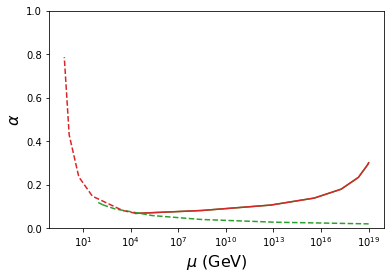

In [605]:
fig, ax = plt.subplots()

EFT5_evol_s = MC.EFT5.coupling_evolution([cn.alpha_s_MZ, 0], cn.MZ, cn.mt)
alpha_s_mt = EFT5_evol_s.y[0][-1]
EFT6_evol_s = MC.EFT6.coupling_evolution([alpha_s_mt, 0], cn.mt, cn.mu_UV)
UV_evol = MC.UV.coupling_evolution(alphas_UV, cn.mu_UV, M)
alpha_d_M = UV_evol.y[1][-1]
EFT_evol_d = MC.EFT6.coupling_evolution([0, alpha_d_M], M, L)

ax.plot(np.exp(UV_evol.t), UV_evol.y[0], 'C2')
ax.plot(np.exp(UV_evol.t), UV_evol.y[1], 'C3')
ax.plot(np.exp(EFT5_evol_s.t), EFT5_evol_s.y[0], 'C2--')
ax.plot(np.exp(EFT6_evol_s.t), EFT6_evol_s.y[0], 'C2--')
ax.plot(np.exp(EFT_evol_d.t), EFT_evol_d.y[1], 'C3--')

ax.set_ylim(0,1)
ax.set_xscale('log')

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=16)
ax.set_ylabel(r'$\alpha$', fontsize=16)

Text(0, 0.5, '$\\alpha^{-1}$')

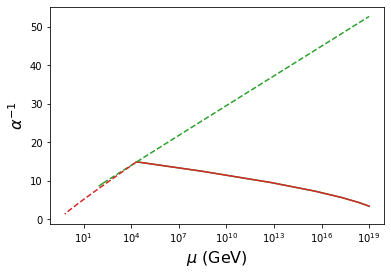

In [606]:
fig, ax = plt.subplots()

ax.plot(np.exp(UV_evol.t), 1/UV_evol.y[0], 'C2')
ax.plot(np.exp(UV_evol.t), 1/UV_evol.y[1], 'C3')
ax.plot(np.exp(EFT5_evol_s.t), 1/EFT5_evol_s.y[0], 'C2--')
ax.plot(np.exp(EFT6_evol_s.t), 1/EFT6_evol_s.y[0], 'C2--')
ax.plot(np.exp(EFT_evol_d.t), 1/EFT_evol_d.y[1], 'C3--')

# ax.set_ylim(0,1)
ax.set_xscale('log')

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=16)
ax.set_ylabel(r'$\alpha^{-1}$', fontsize=16)

In [607]:
aUV_low = MC.alphas_UV_low
aUV_high = MC.alphas_UV_high
eps_v = MC.epsilon_v

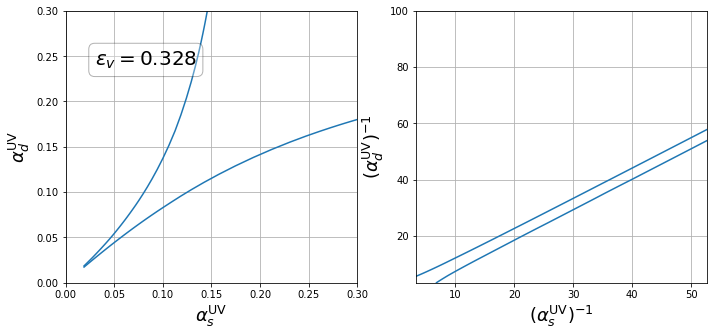

In [608]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11.5,5))

ax1.plot(*aUV_low.T, 'C0')
ax1.plot(*aUV_high.T, 'C0')

ax1.set_xlim(0, 0.3)
ax1.set_ylim(0, 0.3)

ax1.set_xlabel(r'$\alpha_s^\mathrm{UV}$', fontsize = 18)
ax1.set_ylabel(r'$\alpha_d^\mathrm{UV}$', fontsize = 18)

ax1.text(0.03, 0.24, f'$\epsilon_v = $' + f'{eps_v:.3f}', fontsize=20, bbox = dict(boxstyle='round', fc='white', ec='black', alpha=0.3))

ax1.grid()

ax2.plot(*1/aUV_low.T, 'C0')
ax2.plot(*1/aUV_high.T, 'C0')

ax2.set_xlim(1/0.3, 52.7)
ax2.set_ylim(1/0.3, 100)

ax2.set_xlabel(r'$(\alpha_s^\mathrm{UV})^{-1}$', fontsize = 18)
ax2.set_ylabel(r'$(\alpha_d^\mathrm{UV})^{-1}$', fontsize = 18)

ax2.grid()

In [609]:
EFT5_evol_s = MC.EFT5.coupling_evolution((cn.alpha_s_MZ, 0), cn.MZ, cn.mt)
alpha_s_mt = EFT5_evol_s.y[0][-1]
EFT6_evol_s = MC.EFT6.coupling_evolution((alpha_s_mt, 0), cn.mt, cn.mu_UV)

In [668]:
alpha_s_UV_min = EFT6_evol_s.y[0][-1]

In [669]:
Llow, Mlow = MC.Lambda_dQCD_M(aUV_low[0])
Lmid, Mmid = MC.Lambda_dQCD_M([0.3, 0.3])
Lhigh, Mhigh = MC.Lambda_dQCD_M(aUV_high[0])

f'M (low) = {Mlow/1e3:.1f} TeV, M (mid) = {Mmid/1e3:.1f} TeV, M (high) = {Mhigh/1e3:.1f} TeV'

'M (low) = 297598241546.9 TeV, M (mid) = 334403556234.9 TeV, M (high) = 405142923938.5 TeV'

In [658]:
alpha_s_UV_min

0.01897437435099453

# Finding valid SUSY models

## Changing heavy field content

### (6,6)x1 + dark quarks

In [4]:
n_multiplet = np.array([
    [0,0,4,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 4

Nd = 3

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

Text(0, 0.5, '$\\alpha_d^{UV}$')

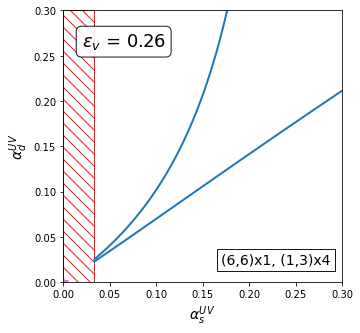

In [14]:
fig, ax = plt.subplots(figsize = (5,5))

line_styles = ['--', '-', '-.']
M_colour = 'C3'
L_colour='C0'

ax.fill_betweenx([0, 0.3], 0, [alpha_s_min, alpha_s_min], facecolor='none', edgecolor=M_colour, hatch=r'\\')

# ax.plot(find_alpha_s_contour(model, a_idx, M_idx), alpha_d_contour, color=M_colour, alpha=0.3)


ax.plot(*SMC.alphas_UV_low.T, L_colour, linewidth=2)
ax.plot(*SMC.alphas_UV_high.T, L_colour, linewidth=2)

ax.plot(*(0,0), 'C6*', markersize=10)

ax.text(0.02, 0.26, r'$\epsilon_v$' + f' = {SMC.epsilon_v:.2f}', fontsize=18, bbox=dict(fc='white', boxstyle='round', alpha=0.9))
ax.text(0.17, 0.02, '(6,6)x1, (1,3)x4', fontsize=14, bbox=dict(fc='white', alpha=0.9))


ax.set_xlim([0,0.3])
ax.set_ylim([0,0.3])
ax.set_xlabel(r'$\alpha_s^{UV}$', fontsize=14)
ax.set_ylabel(r'$\alpha_d^{UV}$', fontsize=14)

### (6,6)x2, (3,3)x1

In [28]:
n_multiplet = np.array([
    [0,6,0,0,0],
    [6,1,0,0,0],
    [0,0,2,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 6

Nd = 3

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

Text(0, 0.5, '$\\alpha_d^{UV}$')

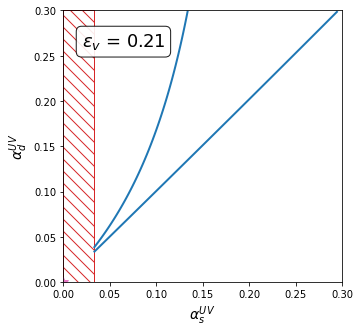

In [29]:
fig, ax = plt.subplots(figsize = (5,5))

line_styles = ['--', '-', '-.']
M_colour = 'C3'
L_colour='C0'

ax.fill_betweenx([0, 0.3], 0, [alpha_s_min, alpha_s_min], facecolor='none', edgecolor=M_colour, hatch=r'\\')

# ax.plot(find_alpha_s_contour(model, a_idx, M_idx), alpha_d_contour, color=M_colour, alpha=0.3)


ax.plot(*SMC.alphas_UV_low.T, L_colour, linewidth=2)
ax.plot(*SMC.alphas_UV_high.T, L_colour, linewidth=2)

ax.plot(*(0,0), 'C6*', markersize=10)

ax.text(0.02, 0.26, r'$\epsilon_v$' + f' = {SMC.epsilon_v:.2f}', fontsize=18, bbox=dict(fc='white', boxstyle='round', alpha=0.9))
# ax.text(0.14, 0.02, f'(6,6)x2, (3,3)x1, ...', fontsize=14, bbox=dict(fc='white', boxstyle='round', alpha=0.9))


ax.set_xlim([0,0.3])
ax.set_ylim([0,0.3])
ax.set_xlabel(r'$\alpha_s^{UV}$', fontsize=14)
ax.set_ylabel(r'$\alpha_d^{UV}$', fontsize=14)

## Permuting dark quarks

So, the idea is that I specify the heavy (usually jointly-charged) field content, which would be inspired by the desired leptogenesis mechanism I am going to implement. Then, I want to change around the number of light and heavy dark quarks and see what values I get for $\epsilon_v$

In [69]:
#specify heavy field content

Nd = 3

n_multiplet = np.array([
    [0,0,1,0,0],
    [6,1,1,0,0],
    [1,1,2,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

h_check = True
n_h = 0
eps_v_prev_h = 0

while h_check:
    # specify light and heavy dark quarks
    n_l = 1
    
    eps_v_prev_l = 0

    l_check = True
    
    while l_check:

        n_13 = n_l + n_h
        n_multiplet[0][1] = n_13
        n_dq = n_l

        SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

        eps_v = SMC.epsilon_v
        
        if eps_v < eps_v_prev_l:
            l_check = False
            break
        
        eps_v_prev_l = eps_v

#         print(f'{n_h} heavy, {n_l} light: {eps_v:.3f}, {n_multiplet[0][1]}')
        n_l += 1
    
    print(f'{n_h} heavy, {n_l - 1} light: {eps_v_prev_l:.3f}')
    
    if (n_l-2 == 1 and eps_v_prev_l < eps_v_prev_h) or n_h > 10:
        h_check = False
        
    eps_v_prev_h = eps_v_prev_l
    n_h += 1

0 heavy, 6 light: 0.208
1 heavy, 6 light: 0.190
2 heavy, 6 light: 0.174
3 heavy, 6 light: 0.161
4 heavy, 6 light: 0.149
5 heavy, 6 light: 0.139
6 heavy, 5 light: 0.137
7 heavy, 5 light: 0.147
8 heavy, 5 light: 0.158
9 heavy, 5 light: 0.170
10 heavy, 5 light: 0.185
11 heavy, 5 light: 0.201


this is just code to test specific models

In [73]:
n_multiplet = np.array([
    [0,6,1,0,0],
    [6,1,1,0,0],
    [1,1,2,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 6

Nd = 3

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

eps_v = SMC.epsilon_v

In [74]:
eps_v

0.2082709373386193

Text(0, 0.5, '$\\alpha_d^{UV}$')

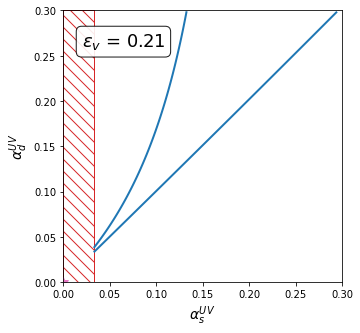

In [90]:
fig, ax = plt.subplots(figsize = (5,5))

line_styles = ['--', '-', '-.']
M_colour = 'C3'
L_colour='C0'

ax.fill_betweenx([0, 0.3], 0, [alpha_s_min, alpha_s_min], facecolor='none', edgecolor=M_colour, hatch=r'\\')

# ax.plot(find_alpha_s_contour(model, a_idx, M_idx), alpha_d_contour, color=M_colour, alpha=0.3)


clow = SMC.alphas_UV_contour(5)
chigh = SMC.alphas_UV_contour(0.2)

eps_v = Polygon(np.concatenate((clow, np.flip(chigh, axis=0), 0.3*np.ones((1,2))))).area/0.3**2

ax.plot(*clow.T, L_colour, linewidth=2)
ax.plot(*chigh.T, L_colour, linewidth=2)

ax.plot(*(0,0), 'C6*', markersize=10)

ax.text(0.02, 0.26, r'$\epsilon_v$' + f' = {eps_v:.2f}', fontsize=18, bbox=dict(fc='white', boxstyle='round', alpha=0.9))
# ax.text(0.14, 0.02, f'(6,6)x2, (3,3)x1, ...', fontsize=14, bbox=dict(fc='white', boxstyle='round', alpha=0.9))


ax.set_xlim([0,0.3])
ax.set_ylim([0,0.3])
ax.set_xlabel(r'$\alpha_s^{UV}$', fontsize=14)
ax.set_ylabel(r'$\alpha_d^{UV}$', fontsize=14)

In this code, I am changing the number of (6,6)s and the number of dark quarks to see how it changes $\epsilon_v$

[0.009950015975018581, 0.013570732617440275, 0.020430758648712077, 0.0365066385973045, 0.09770256994183758, 0.20967207800870014, 0.0418265711479055]
[0.009973575219948277, 0.013653591150860393, 0.020442928959934586, 0.036462523628238805, 0.09732122075261766, 0.2081589879017539, 0.041764857248906224]
[0.009948615557880703, 0.013659615092050869, 0.020417605435761297, 0.03636631467484637, 0.09687112033760333, 0.20678806296621605, 0.04164147931361077]
[0.009921546564521926, 0.013621719665734043, 0.02037602903007494, 0.036254083847194286, 0.09642079573428894, 0.20548032600185542, 0.041497752441736174]


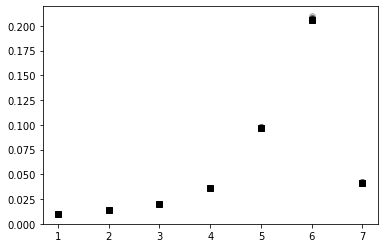

In [117]:
fig, ax = plt.subplots()

ax.plot(n_dqs, eps_vs, 'ks')

Nd = 3

n_66s = np.arange(1,5)
n_dqs = np.arange(1,8)

for n_66 in n_66s:
    eps_vs = []

    for n_dq in n_dqs:

        n_multiplet = np.array([
            [0,n_dq,0,0,0],
            [6,0,0,0,0],
            [0,0,n_66,0,0],
            [0,0,0,0,0],
            [0,0,0,0,0]
        ])

        SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

        eps_vs.append(SMC.epsilon_v)

    ax.plot(n_dqs, eps_vs, 'ko', alpha=0.2*n_66)

## Finding $\epsilon_v$ for the set of models with at most 1 of each new field

This code will generate the SUSY models with at most 1 of each field

In [338]:
fields_3 = ['61', '16', '33', '63', '36']

In [319]:
Nd = 3

SUSY_models=[]

fields = ['61', '16', '33', '63', '36']

models = []
dq_models = []
    
for mults in it.product(*[range(2)]*5):
    n_multiplet = np.zeros((5,5))
    n_multiplet[2,2] = 1 # there is always a (6,6)
    n_multiplet[1,0] = 6 # there are always 6 SM quarks
    
    for field, mult in zip(fields, mults):
        d1, d2 = [int(d) for d in field]
        idx_1 = [dim_T[0] for dim_T in cn.SUN_irreps[Nd]].index(d1)
        idx_2 = [dim_T[0] for dim_T in cn.SUN_irreps[Nd]].index(d2)
        
        n_multiplet[idx_1, idx_2] = mult
        
    epsilons = []
    
    for n_dq in np.arange(1,8):
        n_multiplet[0,1] = n_dq
        SMC = SUSYModelClass(n_multiplet, n_dq, Nd)
        eps_v = SMC.epsilon_v
        epsilons.append(eps_v)
        
        fp = SMC.UV.fixed_point
        
        dq_models.append(list(mults) + [n_dq] + list(fp) + [eps_v])
        
    models.append(list(mults) + [epsilons])

In [71]:
mod_66_df = pd.DataFrame(np.array(models), columns = [f'n{field}' for field in fields] + ['epsilons'])
dq_66_df = pd.DataFrame(np.array(dq_models), columns = [f'n{field}' for field in fields] + ['n13', 'alpha_s_star', 'alpha_d_star', 'eps_v'])

In [164]:
dq_66_df.eps_v

0      0.009950
1      0.013571
2      0.020431
3      0.036507
4      0.097703
         ...   
219    0.020241
220    0.036091
221    0.096805
222    0.210365
223    0.041285
Name: eps_v, Length: 224, dtype: float64

Text(0, 0.5, '$\\alpha_d^*$')

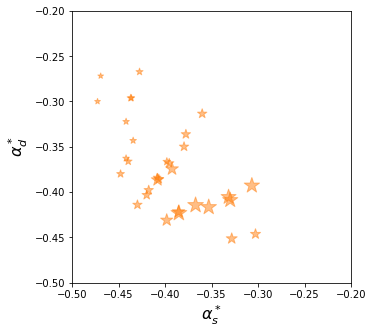

In [184]:
fig, ax = plt.subplots(figsize=(5,5))

cond = dq_66_df.n13 == 5
# ax.scatter(dq_66_df.alpha_s_star[~cond], dq_66_df.alpha_d_star[~cond], s=1000*dq_66_df.eps_v[~cond], c='C0', marker='*', alpha=0.5)
ax.scatter(dq_66_df.alpha_s_star[cond], dq_66_df.alpha_d_star[cond], s=1000*dq_66_df.eps_v[cond], c='C1', marker='*', alpha=0.5)

ax.set_xlim(-0.5, -0.2)
ax.set_ylim(-0.5, -0.2)

# ax.hlines(0, -lim, lim, 'k', linestyle='--', linewidth=1)
# ax.vlines(0, -lim, lim, 'k', linestyle='--', linewidth=1)

ax.set_xlabel(r'$\alpha_s^*$', fontsize=16)
ax.set_ylabel(r'$\alpha_d^*$', fontsize=16)

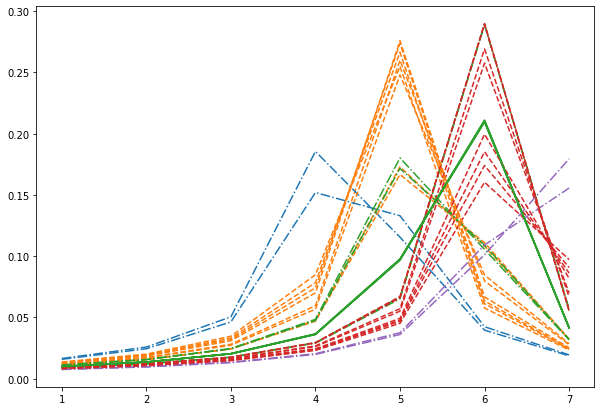

In [343]:
fig, ax = plt.subplots(figsize=(10,7))

linestyles = ['-', '--', '-.']

for model in models:
    n61, n16, n33, n63, n36, eps_vs = model
    asym = (n61 - n16)**2 + (n63 - n36)**2
    vis_dark = n61 + n63 - n16 - n36
    ax.plot(np.arange(1,8), eps_vs, f'C{vis_dark+2}{linestyles[asym]}')

0 [0, 0, 0, 0, 0]
3 [0, 0, 0, 1, 1]
4 [0, 0, 1, 0, 0]
7 [0, 0, 1, 1, 1]
10 [0, 1, 0, 1, 0]
14 [0, 1, 1, 1, 0]
17 [1, 0, 0, 0, 1]
21 [1, 0, 1, 0, 1]
24 [1, 1, 0, 0, 0]
27 [1, 1, 0, 1, 1]
28 [1, 1, 1, 0, 0]
31 [1, 1, 1, 1, 1]
['61', '16', '33', '63', '36']


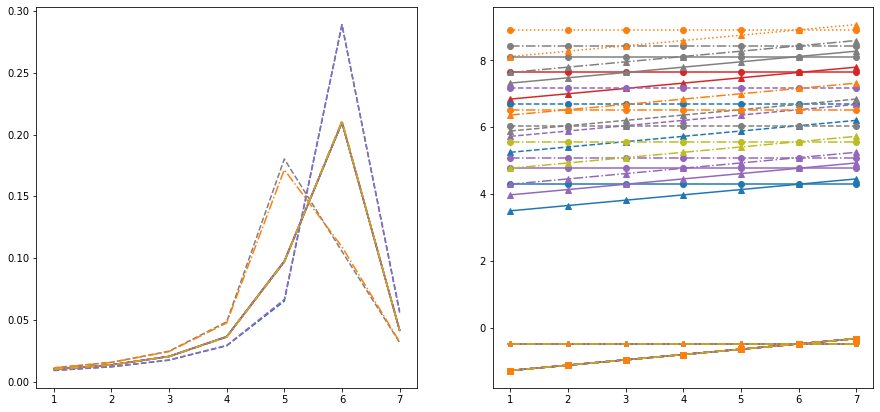

In [485]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))

linestyles = ['-', '--', '-.', ':']

n_dqs = np.arange(1,8)

for model_idx, model in enumerate(models):
    mults = model[:-1]
    eps_vs = model[-1]
    n61, n16, n33, n63, n36 = mults
    
    # Get the multiplicity matrix
    
    n_multiplet = np.zeros((5,5))
    n_multiplet[2,2] = 1 # there is always a (6,6)
    n_multiplet[1,0] = 6 # there are always 6 SM quarks
    
    for field, mult in zip(fields_3, mults):
        d1, d2 = [int(d) for d in field]
        idx_1 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d1)
        idx_2 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d2)
        
        n_multiplet[idx_1, idx_2] = mult
        
    # Define other functions of n_dq I care about (like A_UV, D_UV)
    
    A_UVs = []
    D_UVs = []
    A_SUSYs = []
    D_SUSYs = []
    
    for n_dq in n_dqs:
        n_multiplet[0,1] = n_dq
        
        SMC = SUSYModelClass(n_multiplet, n_dq, Nd=3)
        A_UV = SMC.UV.coeffs[0]
        D_UV = SMC.UV.coeffs[3]
        A_SUSY = SMC.SUSY.coeffs[0]
        D_SUSY = SMC.SUSY.coeffs[3]
        A_UVs.append(A_UV)
        D_UVs.append(D_UV)
        A_SUSYs.append(A_SUSY)
        D_SUSYs.append(D_SUSY)
        
    vis_dark = n61 + n63 - n16 - n36
#     ax.plot(n_dqs, eps_vs, f'C{vis_dark+2}')
    if vis_dark == 0:
        print(model_idx, mults)
        axes[0].plot(n_dqs, eps_vs, c = f'C{model_idx}', linestyle=linestyles[int(np.floor(model_idx/10))])
        axes[1].plot(n_dqs, A_UVs, c = f'C{model_idx}', linestyle=linestyles[int(np.floor(model_idx/10))], marker = 'o')
        axes[1].plot(n_dqs, D_UVs, c = f'C{model_idx}', linestyle=linestyles[int(np.floor(model_idx/10))], marker = '^')
        axes[1].plot(n_dqs, A_SUSYs, c = f'C{model_idx}', linestyle=linestyles[int(np.floor(model_idx/10))], marker = '*')
        axes[1].plot(n_dqs, D_SUSYs, c = f'C{model_idx}', linestyle=linestyles[int(np.floor(model_idx/10))], marker = 's')
        
# axes[0].set_xlim(4.5, 5.5)

print(fields_3)

In [370]:
for dq_model in dq_models:
    mults = dq_model[:5]
    n_dq = dq_model[5]
    ep = dq_model[-1]
    
    n_multiplet = np.zeros((5,5))
    n_multiplet[2,2] = 1 # there is always a (6,6)
    n_multiplet[1,0] = 6 # there are always 6 SM quarks
    n_multiplet[0,1] = n_dq
    
    for field, mult in zip(fields_3, mults):
        d1, d2 = [int(d) for d in field]
        idx_1 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d1)
        idx_2 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d2)
        
        n_multiplet[idx_1, idx_2] = mult
        
    SMC = SUSYModelClass(n_multiplet, n_dq, Nd=3)
    
    print(mults, SMC.UV.coeffs[0], SMC.UV.coeffs[3], SMC.SUSY.coeffs[3], ep)

[0, 0, 0, 0, 0] 4.297183463481175 3.5014087480216975 -1.2732395447351628 0.009950015975018581
[0, 0, 0, 0, 0] 4.297183463481175 3.660563691113593 -1.1140846016432673 0.013570732617440275
[0, 0, 0, 0, 0] 4.297183463481175 3.819718634205488 -0.954929658551372 0.020430758648712077
[0, 0, 0, 0, 0] 4.297183463481175 3.9788735772973833 -0.7957747154594766 0.0365066385973045
[0, 0, 0, 0, 0] 4.297183463481175 4.1380285203892795 -0.6366197723675813 0.09770256994183758
[0, 0, 0, 0, 0] 4.297183463481175 4.297183463481175 -0.477464829275686 0.20967207800870014
[0, 0, 0, 0, 0] 4.297183463481175 4.45633840657307 -0.3183098861837905 0.0418265711479055
[0, 0, 0, 0, 1] 5.252113122032546 5.888732894400127 -1.2732395447351628 0.01355437346506109
[0, 0, 0, 0, 1] 5.252113122032546 6.047887837492023 -1.1140846016432673 0.019995585175510013
[0, 0, 0, 0, 1] 5.252113122032546 6.207042780583919 -0.954929658551372 0.034591471482303016
[0, 0, 0, 0, 1] 5.252113122032546 6.366197723675814 -0.7957747154594766 0.0848

In [250]:
[(np.argmax(model[-1]) + 1, f'{max(model[-1]):.3f}') for model in models]

[(6, '0.210'),
 (5, '0.255'),
 (6, '0.160'),
 (6, '0.210'),
 (6, '0.210'),
 (5, '0.266'),
 (6, '0.174'),
 (6, '0.210'),
 (5, '0.260'),
 (4, '0.186'),
 (6, '0.289'),
 (5, '0.173'),
 (5, '0.248'),
 (4, '0.152'),
 (6, '0.289'),
 (5, '0.167'),
 (6, '0.258'),
 (5, '0.180'),
 (7, '0.179'),
 (6, '0.290'),
 (6, '0.269'),
 (5, '0.172'),
 (7, '0.156'),
 (6, '0.290'),
 (6, '0.211'),
 (5, '0.274'),
 (6, '0.185'),
 (6, '0.211'),
 (6, '0.211'),
 (5, '0.276'),
 (6, '0.200'),
 (6, '0.210')]

In [516]:
Nd = 2

n_dq = 5

n_multiplet1 = np.array([
    [0,n_dq,0,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_multiplet2 = np.array([
    [0,n_dq+1,0,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

SMC1 = SUSYModelClass(n_multiplet1, n_dq, Nd)
SMC2 = SUSYModelClass(n_multiplet2, n_dq+1, Nd)

print(SMC1.UV.coeffs[3], SMC1.SUSY.coeffs[3], SMC1.EFT6.coeffs[3])
print(SMC2.UV.coeffs[3], SMC2.SUSY.coeffs[3], SMC2.EFT6.coeffs[3])
print(SMC2.UV.coeffs[3] - SMC1.UV.coeffs[3], SMC2.SUSY.coeffs[3] - SMC1.SUSY.coeffs[3], SMC2.EFT6.coeffs[3] - SMC1.EFT6.coeffs[3])

3.6605636911135924 -0.15915494309189526 -0.6366197723675813
3.8197186342054876 0.0 -0.5305164769729844
0.15915494309189526 0.15915494309189526 0.10610329539459684


## Symmetric field content

['61', '16', '33', '63', '36']
[0, 0, 0, 0, 0]
0.20967207800870014
['4.30', '7.52', '5.07', '4.30', '7.52', '5.07']
['-0.48', '0.18', '0.00', '-0.48', '0.18', '0.00']
[0, 0, 0, 1, 1]
0.20989473045426688
['7.64', '12.06', '7.09', '7.64', '12.06', '7.09']
['-0.48', '0.18', '0.00', '-0.48', '0.18', '0.00']
[0, 0, 1, 0, 0]
0.2095940478968165
['4.77', '7.95', '5.27', '4.77', '7.95', '5.27']
['-0.48', '0.18', '0.00', '-0.48', '0.18', '0.00']
[0, 0, 1, 1, 1]
0.2097423051774638
['8.12', '12.49', '7.30', '8.12', '12.49', '7.30']
['-0.48', '0.18', '0.00', '-0.48', '0.18', '0.00']
[1, 1, 0, 0, 0]
0.21103170674463748
['5.09', '8.75', '5.07', '5.09', '8.75', '5.07']
['-0.48', '0.18', '0.00', '-0.48', '0.18', '0.00']
[1, 1, 0, 1, 1]
0.21055866907656695
['8.44', '13.28', '7.09', '8.44', '13.28', '7.09']
['-0.48', '0.18', '0.00', '-0.48', '0.18', '0.00']
[1, 1, 1, 0, 0]
0.21079727241080018
['5.57', '9.18', '5.27', '5.57', '9.18', '5.27']
['-0.48', '0.18', '0.00', '-0.48', '0.18', '0.00']
[1, 1, 1, 1, 

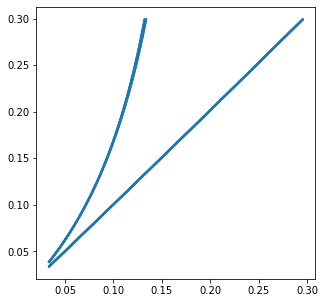

In [484]:
fig, ax = plt.subplots(figsize=(5,5))
print(fields_3)

for model in models:
    mults = model[:-1]
    eps_vs = model[-1]
    n61, n16, n33, n63, n36 = mults
    
    n_multiplet = np.zeros((5,5))
    n_multiplet[2,2] = 1 # there is always a (6,6)
    n_multiplet[1,0] = 6 # there are always 6 SM quarks
    n_multiplet[0,1] = n_dq
    
    for field, mult in zip(fields_3, mults):
        d1, d2 = [int(d) for d in field]
        idx_1 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d1)
        idx_2 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d2)
        
        n_multiplet[idx_1, idx_2] = mult
        
#     # Get the maximum 
#     for n_dq in n_dqs:
#         n_multiplet[0,1] = n_dq
        
#         SMC = SUSYModelClass(n_multiplet, n_dq, Nd=3)
#         A_UV = SMC.UV.coeffs()
        
    asym = (n61 - n16)**2 + (n63 - n36)**2
    vis_dark = n61 + n63 - n16 - n36
    
    if asym == 0 and vis_dark == 0:
        n_dq = 6
        n_multiplet[0,1] = n_dq
        SMC = SUSYModelClass(n_multiplet, n_dq, Nd=3)
        print(mults)
        print(max(eps_vs))
        print([f'{coeff:.2f}' for coeff in SMC.UV.coeffs])
        print([f'{coeff:.2f}' for coeff in SMC.SUSY.coeffs])
        
        clow = SMC.alphas_UV_low
        chigh = SMC.alphas_UV_high

        ax.plot(*clow.T, 'C0', linewidth=2)
        ax.plot(*chigh.T, 'C0', linewidth=2)

## $N_d = 4$

In [335]:
Nd = 4

n_dq = 11

n_multiplet = np.array([
    [0,n_dq,0,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

SMC.epsilon_v

0.3929773069238241

Text(0, 0.5, '$\\alpha_d^{UV}$')

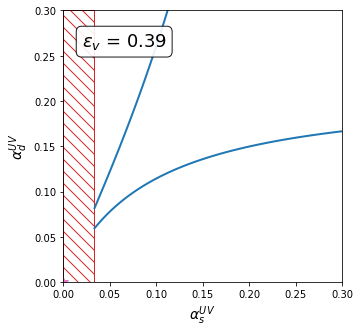

In [151]:
fig, ax = plt.subplots(figsize = (5,5))

line_styles = ['--', '-', '-.']
M_colour = 'C3'
L_colour='C0'

ax.fill_betweenx([0, 0.3], 0, [alpha_s_min, alpha_s_min], facecolor='none', edgecolor=M_colour, hatch=r'\\')

# ax.plot(find_alpha_s_contour(model, a_idx, M_idx), alpha_d_contour, color=M_colour, alpha=0.3)

ax.plot(*SMC.alphas_UV_high.T, L_colour, linewidth=2)
ax.plot(*SMC.alphas_UV_low.T, L_colour, linewidth=2)

ax.plot(*(0,0), 'C6*', markersize=10)

ax.text(0.02, 0.26, r'$\epsilon_v$' + f' = {SMC.epsilon_v:.2f}', fontsize=18, bbox=dict(fc='white', boxstyle='round', alpha=0.9))
# ax.text(0.14, 0.02, f'(6,6)x2, (3,3)x1, ...', fontsize=14, bbox=dict(fc='white', boxstyle='round', alpha=0.9))


ax.set_xlim([0,0.3])
ax.set_ylim([0,0.3])
ax.set_xlabel(r'$\alpha_s^{UV}$', fontsize=14)
ax.set_ylabel(r'$\alpha_d^{UV}$', fontsize=14)

In [340]:
fields_4 = ['61', '16', '34', '64', '36']

In [331]:
Nd = 4

SUSY_models=[]

fields = ['61', '16', '34', '64', '36']

models_4 = []
dq_models_4 = []
    
for mults in it.product(*[range(2)]*5):
    n_multiplet = np.zeros((5,5))
    n_multiplet[2,2] = 1 # there is always a (6,6)
    n_multiplet[1,0] = 6 # there are always 6 SM quarks
    
    for field, mult in zip(fields, mults):
        d1, d2 = [int(d) for d in field]
        idx_1 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d1)
        idx_2 = [dim_T[0] for dim_T in cn.SUN_irreps[Nd]].index(d2)
        
        n_multiplet[idx_1, idx_2] = mult
        
    epsilons = []
    
    for n_dq in np.arange(6,12):
        n_multiplet[0,1] = n_dq
        SMC = SUSYModelClass(n_multiplet, n_dq, Nd)
        eps_v = SMC.epsilon_v
        epsilons.append(eps_v)
        
        fp = SMC.UV.fixed_point
        
        dq_models_4.append(list(mults) + [n_dq] + list(fp) + [eps_v])
        
    models_4.append(list(mults) + [epsilons])

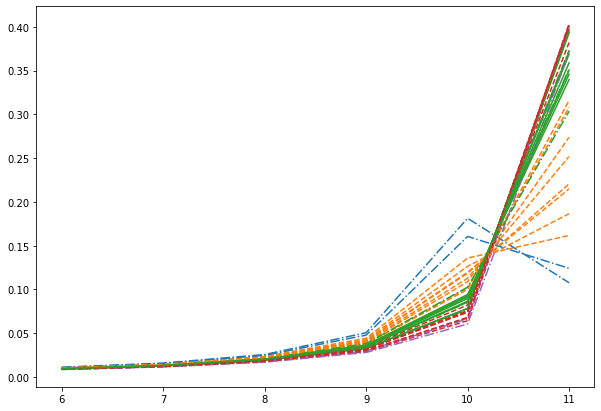

In [333]:
fig, ax = plt.subplots(figsize=(10,7))

linestyles = ['-', '--', '-.']

for model in models_4:
    n61, n16, n34, n64, n36, eps_vs = model
    asym = (n61 - n16)**2 + (n64 - n36)**2
    vis_dark = n61 + n64 - n16 - n36
    ax.plot(np.arange(6,12), eps_vs, f'C{vis_dark+2}{linestyles[asym]}')

## $N_d = 2$

In [341]:
fields_2 = ['61', '13', '32', '62', '33']

In [328]:
Nd = 2

SUSY_models=[]

fields = ['61', '13', '32', '62', '33']

models_2 = []
dq_models_2 = []
    
for mults in it.product(*[range(2)]*5):
    n_multiplet = np.zeros((5,5))
    n_multiplet[2,2] = 1 # there is always a (6,6)
    n_multiplet[1,0] = 6 # there are always 6 SM quarks
    
    for field, mult in zip(fields, mults):
        d1, d2 = [int(d) for d in field]
        idx_1 = [dim_T[0] for dim_T in cn.SUN_irreps[3]].index(d1)
        idx_2 = [dim_T[0] for dim_T in cn.SUN_irreps[Nd]].index(d2)
        
        n_multiplet[idx_1, idx_2] = mult
        
    epsilons = []
    
    for n_dq in np.arange(1,6):
        n_multiplet[0,1] = n_dq
        SMC = SUSYModelClass(n_multiplet, n_dq, Nd)
        eps_v = SMC.epsilon_v
        epsilons.append(eps_v)
        
        fp = SMC.UV.fixed_point
        
        print(n_dq, eps_v)
        
        dq_models_2.append(list(mults) + [n_dq] + list(fp) + [eps_v])
        
    models_2.append(list(mults) + [epsilons])

1 0.0827042861352952
2 0.03144987746051393
3 0.01567174271586105
4 0.008944931229815557
5 0.004754488823760558
1 0.02934115332180191
2 0.016192352948395303
3 0.009777562078287646
4 0.006336179124812701
5 0.003615608272725895
1 0.08907327977719011
2 0.14219517662735856
3 0.03533810021579291
4 0.015102169123196868
5 0.006904190092403244
1 0.13532059149125136
2 0.04034571420661602
3 0.01830672461961662
4 0.009953266111813722
5 0.005136280415045786
1 0.08632238233221139
2 0.03222216354073147
3 0.01591849880483708
4 0.009049210036013413
5 0.004795796712824333
1 0.032050825480150744
2 0.017235155726205306
3 0.010244401497205336
4 0.006564470084277086
5 0.0037211396938871136
1 0.10010685083358495
2 0.12326507213010611
3 0.033233763577241456
4 0.014574626461079609
5 0.006742131799845813
1 0.1349436276272258
2 0.040307564167190946
3 0.018299169755335118
4 0.009950193225848288
5 0.005136513692477616
1 0.038924274054765756
2 0.019683350715945517
3 0.011292908874108701
4 0.007052421349501124
5 0.0

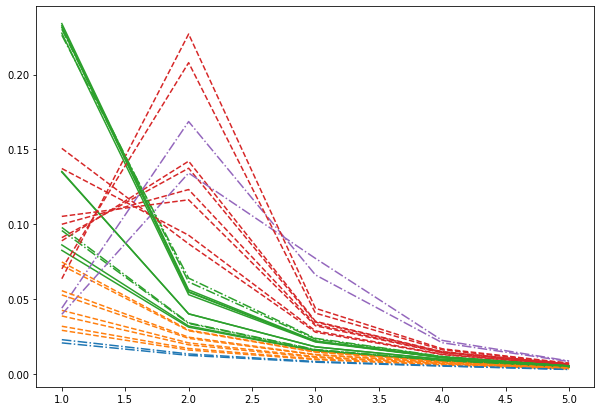

In [330]:
fig, ax = plt.subplots(figsize=(10,7))

linestyles = ['-', '--', '-.']

for model in models_2:
    n61, n16, n34, n64, n36, eps_vs = model
    asym = (n61 - n16)**2 + (n64 - n36)**2
    vis_dark = n61 + n64 - n16 - n36
    ax.plot(np.arange(1,6), eps_vs, f'C{vis_dark+2}{linestyles[asym]}')

# Playing around with models, looking at coefficients

In [564]:
n_dq = 6

n_multiplet = np.array([
    [0,n_dq,0,0,0],
    [6,1,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_fermion = np.array([
    [0,n_dq,0,0,0],
    [6,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

SMC = SUSYModelClass(n_multiplet, n_dq, Nd=3)

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd=3)

In [565]:
MC.UV.coeffs

[-1.1140846016432675,
 -0.3292938468375979,
 0.0,
 -1.1140846016432675,
 -0.3292938468375979,
 0.0]